<a href="https://colab.research.google.com/github/alandgmendes/analises_facilitadora/blob/main/analise_facilitadora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados da Facilitadora Cultural referente a projetos da Lei Paulo Gustavo

Essa análise inicial visa discutir o agregado dos projetos onde a facilitadora teve participação e suas planilhas orçamentárias

Inicialmente vamos importar as bibliotecas necessárias

In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import zipfile
from zipfile import ZipFile
import locale
import re

Inicialmente vamos estudar a planilha 'Controle de Projetos LPG - Facilitadora Cultural
'

In [2]:

def format_brazilian_currency(value):
    # Format the value as currency with commas as cent separator and dots as milliard separator
    formatted_value = '{:,.2f}'.format(value)

    # Replace default separators with Brazilian style
    formatted_value = formatted_value.replace(',', 'X').replace('.', ',').replace('X', '.')

    # Add 'R$ ' before the value
    formatted_value = 'R$ ' + formatted_value

    return formatted_value

# Actual path to your Excel file
excel_file_path = 'Controle de Projetos LPG - Facilitadora Cultural.xlsx'

# Specify the range of rows and columns you want to select
start_row = 2  # Start from row 2 (assuming header is in the first row)
end_row = 21   # End at row 22
columns_to_select = ['Projeto', 'Gênero', 'Proponente', 'Cidade', 'Nível de Envolvimento', 'Status', 'Edital', 'Valor', 'Link']  # Replace with your column names

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path, header=0)  # Assuming the header is in the first row

# Select the desired range of rows and columns
selected_data = df.loc[start_row-1:end_row-1, columns_to_select]
df = selected_data
# Print the selected data
print('Todos os projetos:')

# Filter the DataFrame by 'Status' equal to 'CANCELADO'
df_cancelado = df[df['Status'] == 'CANCELADO']
df = df[df['Status'] != 'CANCELADO']

print('Cancelados:')
print(df_cancelado['Projeto'])

print('Ativos:')
print(df['Projeto'])

# Calculate the sum, average, and median of the 'Valor' column
valor_sum = df['Valor'].sum()
valor_avg = df['Valor'].mean()
valor_median = df['Valor'].median()


# Print the formatted results
print("Valor total:", format_brazilian_currency(valor_sum))
print("Valor médio por projeto:", format_brazilian_currency(valor_avg))
print("Valor mediano:", format_brazilian_currency(valor_median))

Todos os projetos:
Cancelados:
19    Dançando Pela Vida
20         Festa da Luz 
Name: Projeto, dtype: object
Ativos:
1                          Seletiva Festival Marreco
2                             Cidade de Muitas Vozes
3         Café na Agulha (aplicar imposto de R$5156)
4            Festival Balaio Audiovisual do Interior
5     Videoclipes Pieit (aplicar imposto de R$4.860)
6                                  Educando com Arte
7                             Teatro Na Melhor Idade
8                 Telas do Mundo - Cinema Itinerante
9               Concerto de Abertura Turnê 2024 OFPM
10                              Espetáculo JALAMERÁ 
11                          Vdeoclipe Terra do Milho
12            Prêmio Pessoa Física - Vivaldo Artesão
13        Prêmio Pessoa Física - Consuelo Nepomuceno
14                      Prêmio Pessoa Física - Vilar
15                  Prêmio Pessoa Física - Sr Xopotó
16              Prêmio Pessoa Física - Jacson Xavier
17            Prêmio Pessoa Física

Sobre os cancelados temos:

In [3]:
# Print the sum of the 'Valor' column
valor_sum = df_cancelado['Valor'].sum()
print(f"Total Cancelado:: {valor_sum}")

# Print valor values in the 'Gênero' column
genero_values = df_cancelado['Gênero'].unique()
print("\nGênero dos cancelados:")
print(genero_values)

# Print unique values in the 'Edital' column
edital_values = df_cancelado['Edital'].unique()
print("\nEditais dos cancelados:")
print(edital_values)

# Print unique values in the 'Projeto' column
edital_values = df_cancelado['Projeto'].unique()
print("\nNomes dos cancelados:")
print(edital_values)

Total Cancelado:: 36423.0

Gênero dos cancelados:
['Dança' 'videomapping']

Editais dos cancelados:
['Demais áreas' 'Producao audiovisual']

Nomes dos cancelados:
['Dançando Pela Vida' 'Festa da Luz ']


Sobre os ativos


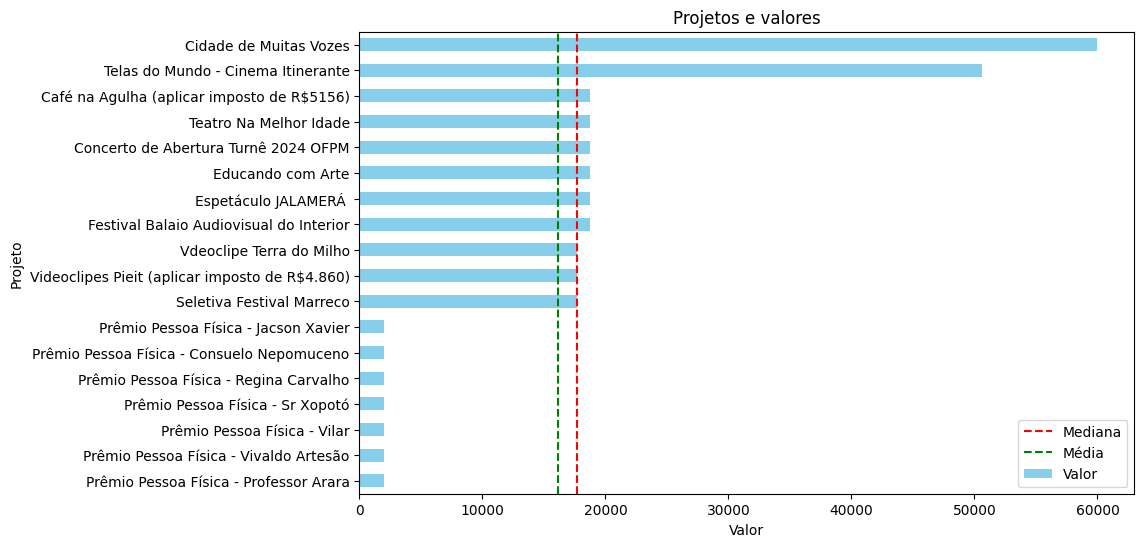

In [4]:
# Assuming 'Projeto' is the column containing project names, and 'Valor' is the column with values
# Replace these with your actual column names
projects = df['Projeto']
values = df['Valor']

# Calculate median and average
valor_median = values.median()
valor_avg = values.mean()

# Plot a bar chart of 'Valor' for each 'Projeto'
plt.figure(figsize=(10, 6))
projeto_sum = df.groupby('Projeto')['Valor'].sum().sort_values()
projeto_sum.plot(kind='barh', color='skyblue')

# Add lines for median and average
plt.axvline(valor_median, color='red', linestyle='--', label='Mediana')
plt.axvline(valor_avg, color='green', linestyle='--', label='Média')


plt.title('Projetos e valores')
plt.xlabel('Valor')
plt.ylabel('Projeto')
plt.legend()
plt.show()

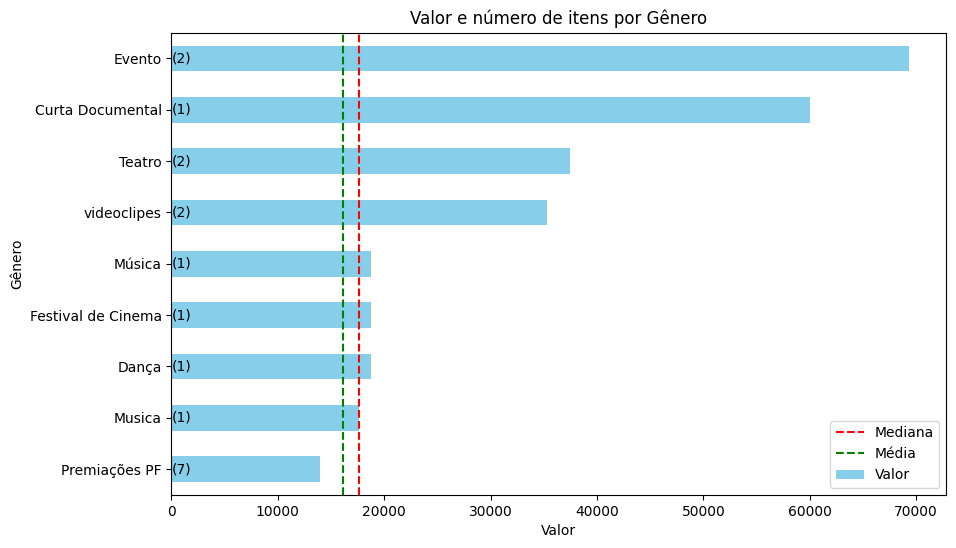

In [5]:
# Sum 'Valor' by 'Gênero'
genero_sum = df.groupby('Gênero')['Valor'].sum().sort_values()
genero_count = df['Gênero'].value_counts().loc[genero_sum.index]  # Count of items in each 'Gênero'

# Create a bar chart for each 'Gênero'
plt.figure(figsize=(10, 6))
genero_sum.plot(kind='barh', color='skyblue', label='Valor')

# Add lines for median and average
plt.axvline(valor_median, color='red', linestyle='--', label='Mediana')
plt.axvline(valor_avg, color='green', linestyle='--', label='Média')


# Display count of items in the legend
for genero, count in genero_count.items():
    plt.text(0, genero_sum.index.get_loc(genero), f'({count})', va='center', ha='left', color='black')

plt.title('Valor e número de itens por Gênero')
plt.xlabel('Valor')
plt.ylabel('Gênero')
plt.legend(loc='lower right')  # Set the legend to the bottom right
plt.show()

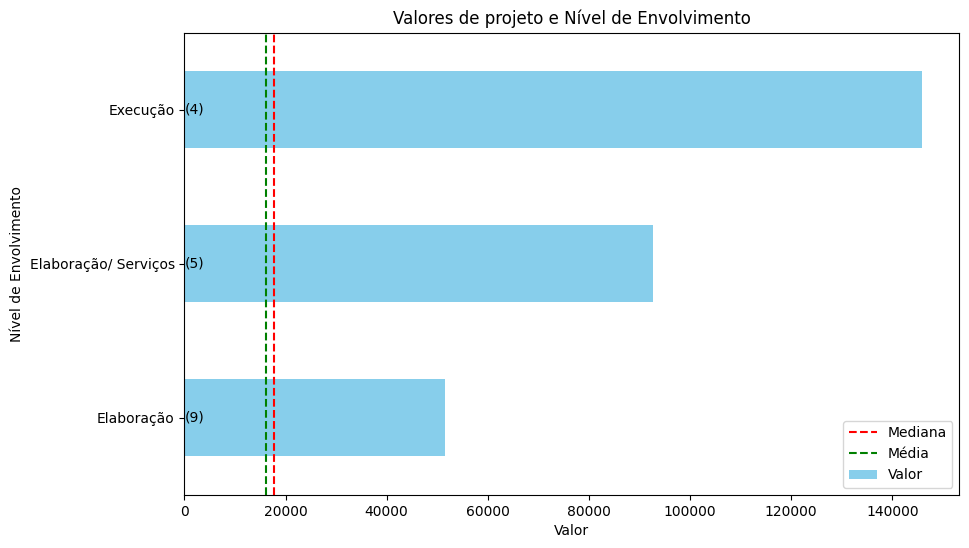

In [6]:
# Sum 'Valor' by 'Nível de Envolvimento'
nivel_sum = df.groupby('Nível de Envolvimento')['Valor'].sum().sort_values()
nivel_count = df['Nível de Envolvimento'].value_counts().loc[nivel_sum.index]  # Count of items in each 'Nível de Envolvimento'

# Create a bar chart for each 'Nível de Envolvimento'
plt.figure(figsize=(10, 6))
nivel_sum.plot(kind='barh', color='skyblue', label='Valor')

# Add lines for median and average
plt.axvline(valor_median, color='red', linestyle='--', label='Mediana')
plt.axvline(valor_avg, color='green', linestyle='--', label='Média')

# Display count of items in the legend
for nivel, count in nivel_count.items():
    plt.text(0, nivel_sum.index.get_loc(nivel), f'({count})', va='center', ha='left', color='black')

plt.title('Valores de projeto e Nível de Envolvimento')
plt.xlabel('Valor')
plt.ylabel('Nível de Envolvimento')
plt.legend(loc='lower right')  # Set the legend to the bottom right
plt.show()

Vamos agora analisar as planilhas orçamentárias. Atualmente, o melhor meio para fazer upload delas é colocá-las num arquvio chamado files.zip(Obs: os proetos da categoria Pessoa física não têm planilhas orçamentárias associadas)


In [7]:
# Path to the zip file
zip_file_path = 'files.zip'

# Directory to extract the contents of the zip file
extracted_dir = 'extracted_data'

# Create the directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Extract the contents of the zip file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Get a list of all xlsx files in the extracted directory
xlsx_files = [file for file in os.listdir(extracted_dir) if file.endswith('.xlsx')]

# Dictionary to store DataFrames for each project
dataframes = {}

# Iterate through each xlsx file, read into a DataFrame, and store in a dictionary
for xlsx_file in xlsx_files:
    # Extract project name from the file name
    project_name = xlsx_file.split('-')[1].strip().split('.xlsx')[0].strip()

    # Read xlsx into a DataFrame
    file_path = os.path.join(extracted_dir, xlsx_file)

    # Read the file and skip the first 3 rows to get to the 4th row (index 3)
    df = pd.read_excel(file_path, skiprows=3)

    # Store the DataFrame in the dictionary with the project name as the key
    dataframes[project_name] = df

# Now, dataframes dictionary contains DataFrames for each project
# You can access them like dataframes['Cidade de Muitas Vozes']

In [8]:
for project_name, df in dataframes.items():
    print(f"DataFrame Name: {project_name}")
    print("Columns:")
    for column in df.columns:
        print(f"  - {column}")
    print()

DataFrame Name: Videoclipe Pieit
Columns:
  - Descrição do Item
  - Justificativa
  - Unidade de Medida
  - Valor Unitário
  - Quantidade
  - Valor Total
  - TRABALHO 
  - 13

DataFrame Name: Cidade de Muitas Vozes
Columns:
  - Descrição do Item
  - Justificativa
  - Unidade de Medida
  - Valor Unitário
  - Quantidade
  - Valor Total
  - EMPREGOS:
  - 27

DataFrame Name: Espetáculo JALAMERÁ
Columns:
  - Descrição do Item
  - Justificativa
  - Unidade de Medida
  - Valor Unitário
  - Quantidade
  - Valor Total

DataFrame Name: Educando com Arte
Columns:
  - Descrição do Item
  - Justificativa
  - Unidade de Medida
  - Valor Unitário
  - Quantidade
  - Valor Total

DataFrame Name: Teatro na Melhor Idade
Columns:
  - Descrição do Item
  - Justificativa
  - Unidade de Medida
  - Valor Unitário
  - Quantidade
  - Valor Total
  - Unnamed: 6

DataFrame Name: Videoclipe Terra do Milho
Columns:
  - Descrição do Item
  - Justificativa
  - Unidade de Medida
  - Valor Unitário
  - Quantidade
  - V

Analisaremos a princípio as colunas comuns a todas as tabelas

In [9]:
# List of universal columns
universal_columns = ['Descrição do Item', 'Justificativa', 'Unidade de Medida', 'Valor Unitário', 'Quantidade', 'Valor Total']

# Dictionary to store DataFrames for each project with common columns
dataframesCommon = {}
# Iterate through each project and its corresponding DataFrame
for project_name, df in dataframes.items():
    # Filter the columns to keep only universal columns
    df = df[universal_columns]

    # Update the dataframe in the dictionary
    dataframesCommon[project_name] = df

    # Print the project name and updated columns
    print(f"Project: {project_name}")
    print(f"Updated Columns:{df.columns}")

    # Add a blank line for better readability
    print("\n")

Project: Videoclipe Pieit
Updated Columns:Index(['Descrição do Item', 'Justificativa', 'Unidade de Medida',
       'Valor Unitário', 'Quantidade', 'Valor Total'],
      dtype='object')


Project: Cidade de Muitas Vozes
Updated Columns:Index(['Descrição do Item', 'Justificativa', 'Unidade de Medida',
       'Valor Unitário', 'Quantidade', 'Valor Total'],
      dtype='object')


Project: Espetáculo JALAMERÁ
Updated Columns:Index(['Descrição do Item', 'Justificativa', 'Unidade de Medida',
       'Valor Unitário', 'Quantidade', 'Valor Total'],
      dtype='object')


Project: Educando com Arte
Updated Columns:Index(['Descrição do Item', 'Justificativa', 'Unidade de Medida',
       'Valor Unitário', 'Quantidade', 'Valor Total'],
      dtype='object')


Project: Teatro na Melhor Idade
Updated Columns:Index(['Descrição do Item', 'Justificativa', 'Unidade de Medida',
       'Valor Unitário', 'Quantidade', 'Valor Total'],
      dtype='object')


Project: Videoclipe Terra do Milho
Updated Column

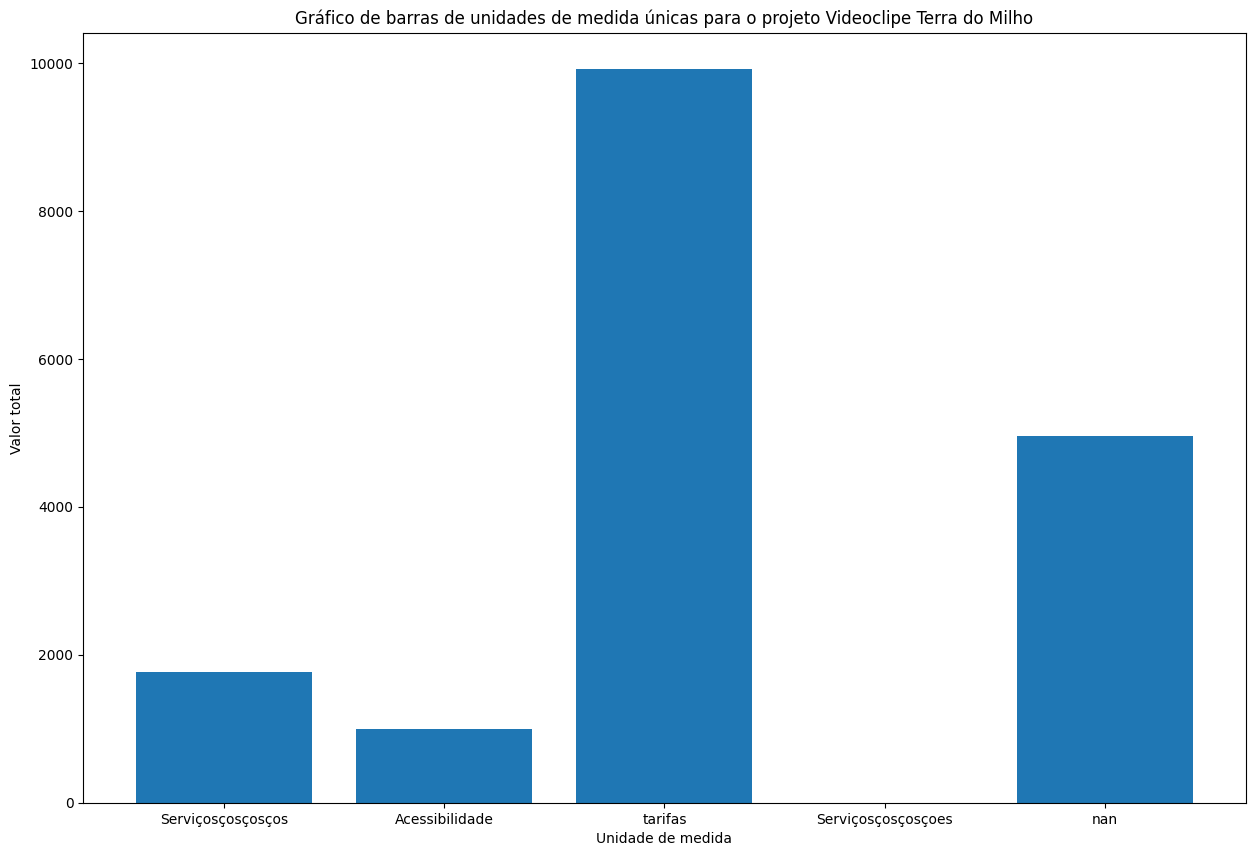


Projeto: Videoclipe Terra do Milho
Quantidade de unidades de medida iguais a "serviço": 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
Name: Unidade de Medida, dtype: int64
Média, mediana e valor total da soma de "serviço": nan, nan, 0


In [19]:

test = dataframesCommon['Videoclipe Terra do Milho']
def generate_project_charts(df):

    # Replace all words starting with "servi" or "Servi" with "Serviços"
    df['Unidade de Medida'] = df['Unidade de Medida'].str.replace('servi(es)?|Servi', 'Serviços', regex=True, flags=re.IGNORECASE)


    # Calculate the total value of each item
    df['Valor Total'] = df['Valor Unitário'] * df['Quantidade']

    # Calculate the total value of each unit of measure
    df_unit_values = df.groupby('Unidade de Medida')['Valor Total'].sum()

    # Create a list of unique unit of measures
    unique_unit_values = df['Unidade de Medida'].unique()

    # Calculate the count of units of measure equal to "serviço"
    count_service = df['Unidade de Medida'].str.lower().str.count('Serviços')

    # Calculate the mean, median, and total value of "serviço"
    service_values = df[df['Unidade de Medida'].str.lower().str.contains('Serviços')]['Valor Total']
    mean_service = service_values.mean()
    median_service = service_values.median()
    total_service = service_values.sum()

    # Plot the bar chart
    plt.figure(figsize=(15, 10))
    plt.bar(unique_unit_values, df_unit_values)
    plt.title(f'Gráfico de barras de unidades de medida únicas para o projeto {df.name}')
    plt.xlabel('Unidade de medida')
    plt.ylabel('Valor total')
    plt.show()

    print(f'\nProjeto: {df.name}')
    print(f'Quantidade de unidades de medida iguais a "serviço": {count_service}')
    print(f'Média, mediana e valor total da soma de "serviço": {mean_service}, {median_service}, {total_service}')


# Example
test.name = 'Videoclipe Terra do Milho'
generate_project_charts(test)
#analyze_dataframe(test)